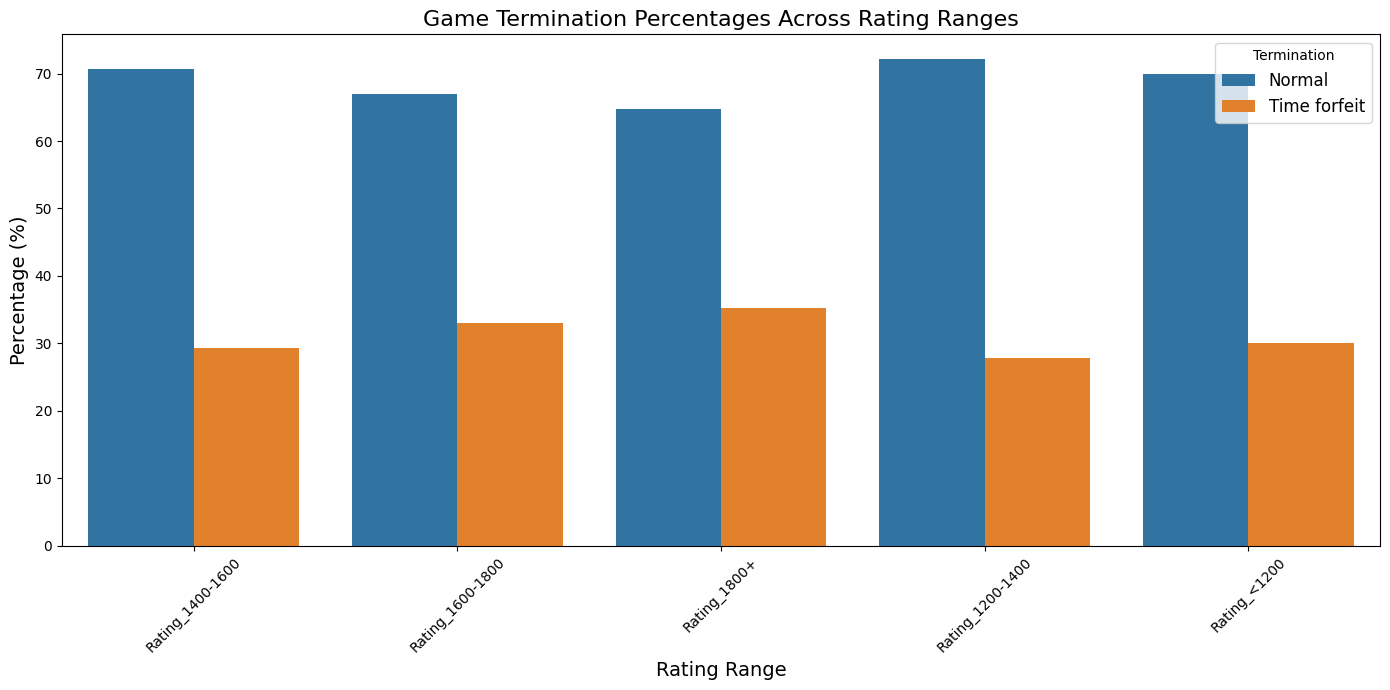

In [1]:
import re
from collections import defaultdict
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Function to parse a single game's metadata
def parse_game(game):
    ratings = re.findall(r'\[WhiteElo "(\d+)"\]\s*\[BlackElo "(\d+)"\]', game)
    termination = re.findall(r'\[Termination "(.*?)"\]', game)
    if ratings and termination:
        white_rating, black_rating = map(int, ratings[0])
        termination_type = termination[0]
        avg_rating = (white_rating + black_rating) // 2
        return avg_rating, termination_type
    return None, None

# Function to determine the rating range
def get_rating_range(avg_rating):
    if avg_rating < 1200:
        return "Rating_<1200"
    elif avg_rating <= 1400:
        return "Rating_1200-1400"
    elif avg_rating <= 1600:
        return "Rating_1400-1600"
    elif avg_rating <= 1800:
        return "Rating_1600-1800"
    else:
        return "Rating_1800+"

# Initialize data structure for counting terminations in rating ranges
rating_range_terminations = defaultdict(lambda: defaultdict(int))

# Read and parse the PGN file
with open("../data/original_lichess.pgn", "r") as file:
    pgn_data = file.read()

# Split the file into individual games
games = pgn_data.strip().split("\n\n")

# Process each game
for game in games:
    avg_rating, termination = parse_game(game)
    if avg_rating and termination:
        rating_range = get_rating_range(avg_rating)
        rating_range_terminations[rating_range][termination] += 1

# Convert the termination data to a DataFrame
rows = []
for rating_range, terminations in rating_range_terminations.items():
    total_games = sum(terminations.values())
    for termination, count in terminations.items():
        percentage = (count / total_games) * 100
        rows.append({"Rating Range": rating_range, "Termination": termination, "Percentage": percentage})

df = pd.DataFrame(rows)

# Create a grouped bar chart to visualize termination percentages across rating ranges
plt.figure(figsize=(14, 7))
sns.barplot(data=df, x="Rating Range", y="Percentage", hue="Termination")

plt.title("Game Termination Percentages Across Rating Ranges", fontsize=16)
plt.xlabel("Rating Range", fontsize=14)
plt.ylabel("Percentage (%)", fontsize=14)
plt.xticks(rotation=45)
plt.legend(title="Termination", fontsize=12)
plt.tight_layout()

# Display the plot
plt.show()
